In [80]:
import pandas as pd
%matplotlib inline  

THRESH = 9
OUTLIERS = 2

## Reading in all the data

In [5]:
actual = pd.read_excel('actual.xlsx')
predicted = pd.read_csv('predicted.csv')

In [8]:
actual = actual[['full name', 'Right', 'Left']]

In [63]:
actual.sort_values(['Left']).head()

,full name,Right,Left
322,BMNHE_1353198.JPG,11.982,10.181
330,BMNHE_1355296.JPG,11.390,10.682
305,BMNHE_1355340.JPG,12.664,10.967
331,BMNHE_1355377.JPG,11.952,11.121
352,BMNHE_1355391.JPG,11.866,11.233


In [56]:
predicted.sort_values(['left_wing (mm)']).head()

,image_id,left_wing (mm),right_wing (mm)
112,BMNHE_1353953.JPG,0.51,6.63
234,BMNHE_1361681.JPG,0.75,6.01
161,BMNHE_1355357.JPG,0.76,2.84
87,BMNHE_1355367.JPG,0.82,6.19
418,BMNHE_1353922.JPG,1.83,5.92


### Taking all rows that need to be doubled and doubling them into a new dataframe, doubles

In [53]:
mod_pred = predicted

doubles = mod_pred.loc[(mod_pred['left_wing (mm)'] < THRESH) & (mod_pred['right_wing (mm)'] < THRESH)]
doubles['left_wing (mm)'] = doubles['left_wing (mm)'] * 2
doubles['right_wing (mm)'] = doubles['right_wing (mm)'] * 2
doubles.sort_values(['left_wing (mm)']).head()

/Users/Sera/anaconda/envs/dev3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/Sera/anaconda/envs/dev3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,image_id,left_wing (mm),right_wing (mm)
112,BMNHE_1353953.JPG,1.02,13.26
234,BMNHE_1361681.JPG,1.50,12.02
161,BMNHE_1355357.JPG,1.52,5.68
87,BMNHE_1355367.JPG,1.64,12.38
418,BMNHE_1353922.JPG,3.66,11.84


### Keeping only the previous rows where either value doesn't need to be doubled

In [54]:
mod_pred = mod_pred[(mod_pred['left_wing (mm)'] > THRESH) | (mod_pred['right_wing (mm)'] > THRESH)]
mod_pred.sort_values(['left_wing (mm)']).head()

,image_id,left_wing (mm),right_wing (mm)
484,BMNHE_1354038.JPG,5.51,12.85
21,BMNHE_1354229.JPG,6.70,11.16
89,BMNHE_1354122.JPG,7.69,12.30
77,BMNHE_1353912.JPG,8.20,14.25
480,BMNHE_1353218.JPG,8.25,12.33


In [57]:
new_pred = pd.concat([mod_pred, doubles])
new_pred.sort_values(['left_wing (mm)']).head()

,image_id,left_wing (mm),right_wing (mm)
112,BMNHE_1353953.JPG,1.02,13.26
234,BMNHE_1361681.JPG,1.50,12.02
161,BMNHE_1355357.JPG,1.52,5.68
87,BMNHE_1355367.JPG,1.64,12.38
418,BMNHE_1353922.JPG,3.66,11.84


### Merging them together and creating new columns for the difference between predicted and actual

In [58]:
og = pd.merge(actual, mod_pred, left_on = 'full name', right_on = 'image_id').drop(['image_id'], axis=1)
both = og

In [59]:
both.head()

,full name,Right,Left,left_wing (mm),right_wing (mm)
0,BMNHE_1353957.JPG,16.341,16.578,16.05,15.94
1,BMNHE_1354081.JPG,13.779,13.255,12.95,13.33
2,BMNHE_1354038.JPG,13.468,13.562,5.51,12.85
3,BMNHE_1355503.JPG,14.401,14.122,13.31,14.20
4,BMNHE_1355402.JPG,15.122,14.994,14.06,14.58


In [60]:
both['left_diff'] = both['Left'] - both['left_wing (mm)']
both['right_diff'] = both['Right'] - both['right_wing (mm)']

In [61]:
both.head()

,full name,Right,Left,left_wing (mm),right_wing (mm),left_diff,right_diff
0,BMNHE_1353957.JPG,16.341,16.578,16.05,15.94,0.528,0.401
1,BMNHE_1354081.JPG,13.779,13.255,12.95,13.33,0.305,0.449
2,BMNHE_1354038.JPG,13.468,13.562,5.51,12.85,8.052,0.618
3,BMNHE_1355503.JPG,14.401,14.122,13.31,14.20,0.812,0.201
4,BMNHE_1355402.JPG,15.122,14.994,14.06,14.58,0.934,0.542


In [82]:
all_diffs = both['right_diff'].append(both['left_diff'])

### Outliers

In [83]:
outliers = all_diffs[(all_diffs < -OUTLIERS) | (all_diffs > OUTLIERS)]
outliers

6       7.188
30     11.480
49      7.397
82      2.983
91      9.359
98      6.854
99      8.393
2       8.052
12      3.350
31      4.547
33      6.113
52      3.450
63      4.595
70      5.196
100   -11.401
103     3.674
dtype: float64

In [84]:
all_diffs = all_diffs[(all_diffs > -OUTLIERS) & (all_diffs < OUTLIERS)]

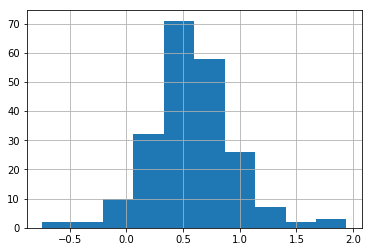

In [86]:
all_diffs.hist()